#### Imports
This is notebook run on <ins>Google Colab</ins>. Import the necessary libraries.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Load the dataset

Read a csv file from the given URL and store it in a Pandas DataFrame. 

In [ ]:
url= 'https://raw.githubusercontent.com/sfarrugia15/Ethereum_Fraud_Detection/master/Account_Stats/Complete.csv'
df = pd.read_csv(url) #, usecols=columns
df.head()

,Index,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type
0,1,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31,34.12,4815.43,3,13,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,1,3976.50,834.77,9622.53,2,2,0,1,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
2,3,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,1,112.90,31.87,321.42,2,3,0,3,...,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
3,4,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,1,2300.37,65.10,73091.00,29,98,0,89,...,0.0,81324.0746,5232.816018,0.0,0.0,0.0,22.0,37.0,OCoin,OCoin
4,5,0x005b9f4516f8e640bbe48136901738b323c53b00,1,0.00,0.00,0.00,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.

`df.shape` displays the shape of the DataFrame with the structure (rows, columns).

In [ ]:
df.shape

(4681, 50)

`df.info()` displays information about the DataFrame, such as the data type of each column and the number of non-null values within it. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4681 entries, 0 to 4680
Data columns (total 50 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Index                                                  4681 non-null   int64  
 1   Address                                                4681 non-null   object 
 2   FLAG                                                   4681 non-null   int64  
 3   Avg_min_between_sent_tnx                               4681 non-null   float64
 4   Avg_min_between_received_tnx                           4681 non-null   float64
 5   Time_Diff_between_first_and_last_(Mins)                4681 non-null   float64
 6   Sent_tnx                                               4681 non-null   int64  
 7   Received_Tnx                                           4681 non-null   int64  
 8   Number_of_Created_Contracts                     

####  Address Validation
The function `address_validation` validates if a string is a valid Ethereum address by testing if the address string is 42 characters long. If it is, the address is passed to the `test()` function to check if it is a valid checksum encoded address. If the address is valid, the original address string is returned. If the address is not valid, the encoded string is returned. If the address string is not 42 characters long, the result is "not an ethereum address". 

In [ ]:
#Source code: https://github.com/ethereum/EIPs/blob/master/EIPS/eip-55.md
# Author: Vitalik Buterin
!pip3 install eth-hash
!pip3 install eth-abi
!pip3 install eth-account
!pip3 install eth-keys
!pip3 install eth-utils
!pip3 install rlp
import eth_utils


def checksum_encode(addr): # Takes a 20-byte binary address as input
    hex_addr = addr.hex()
    checksummed_buffer = ""

    # Treat the hex address as ascii/utf-8 for keccak256 hashing
    hashed_address = eth_utils.keccak(text=hex_addr).hex()

    # Iterate over each character in the hex address
    for nibble_index, character in enumerate(hex_addr):

        if character in "0123456789":
            # We can't upper-case the decimal digits
            checksummed_buffer += character
        elif character in "abcdef":
            # Check if the corresponding hex digit (nibble) in the hash is 8 or higher
            hashed_address_nibble = int(hashed_address[nibble_index], 16)
            if hashed_address_nibble > 7:
                checksummed_buffer += character.upper()
            else:
                checksummed_buffer += character
        else:
            raise eth_utils.ValidationError(
                f"Unrecognized hex character {character!r} at position {nibble_index}"
            )

    return "0x" + checksummed_buffer

def test(addr_str):
    addr_bytes = eth_utils.to_bytes(hexstr=addr_str)
    checksum_encoded = checksum_encode(addr_bytes)
    try:
      assert checksum_encoded == addr_str, f"{checksum_encoded} != expected {addr_str}"
    except AssertionError:
      return checksum_encoded

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def address_validation(addr_str):
    if len(addr_str) == 42:
            result = test(addr_str)
    else:
        result = "not an ethereum address"
    return result

In [ ]:
df ['valid_add']=df['Address'].apply(address_validation)

Display the first five rows of the `df` dataframe, including the `valid_add` column. This will allow us to see the results of the address validation process.

In [ ]:
df.head()

,Index,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type,valid_add
0,1,0x0020731604c882cf7bf8c444be97d17b19ea4316,1,1457.31,34.12,4815.43,3,13,0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x0020731604C882cF7bF8C444BE97d17b19Ea4316
1,2,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,1,3976.50,834.77,9622.53,2,2,0,1,...,0.0000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU,0x002Bf459dC58584D58886169EA0E80f3Ca95FFAF
2,3,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,1,112.90,31.87,321.42,2,3,0,3,...,0.0000,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU,0x002f0C8119C16D310342D869Ca8bF6AcE34D9c39
3,4,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,1,2300.37,65.10,73091.00,29,98,0,89,...,81324.0746,5232.816018,0.0,0.0,0.0,22.0,37.0,OCoin,OCoin,0x0059b14e35daB1b4EEe1e2926C7A5660dA66F747
4,5,0x005b9f4516f8e640bbe48136901738b323c53b00,1,0.00,0.00,0.00,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0x005B9F4516f8E640BBe48136901738b323c53b00


Create and display the list of all the addresses that were not valid Ethereum addresses. 

In [ ]:
invalid_addresses=df.loc[df['valid_add'] == "not an ethereum address"].Address.to_list()
invalid_addresses

['0x11c058c3efbf53939fb6872b09a2b5cf2410a1e2c3f3c867664e43a626d878c0',
 '0x1c6e3348a7ea72ffe6a384e51bd1f36ac1bcb4264f461889a318a3bb2251bf19',
 '0x2dfe2e0522cc1f050edcc7a05213bb55bbb36884ec9468fc39eccc013c65b5e4',
 '0x5a27a79f5217cad7d95cefcce0ecd18a4c33df84et',
 '0x9cdfc5b0aca4527a0916412e9dbd6ad85556a49']

Remove all the invalid Ethereum addresses from the dataframe. 

In [ ]:
df = df[~df['Address'].isin(invalid_addresses)]

#### Check for Duplicates
Check if there are any duplicate addresses in the dataframe, which will return a boolean value indicating whether there are any duplicate addresses. If there are duplicate addresses, display them.

In [ ]:
df.duplicated(subset=['Address']).any()

True

In [ ]:
addresses = df["Address"]
df[addresses.isin(addresses[addresses.duplicated()])].sort_values("Address")

,Index,Address,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,...,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,ERC20_most_sent_token_type,ERC20_most_rec_token_type,valid_add
2755,577,0x75e7f640bf6968b6f32c47a3cd82c3c2c9dcae68,0,5.43,5.01,51182.03,2575,7425,0,1100,...,2.257947e+04,2.021695e+03,0.0,0.0,0.0,30.0,200.0,OmiseGO,KickCoin,0x75E7F640bf6968b6f32C47a3Cd82C3C2C9dCae68
3995,1817,0x75e7f640bf6968b6f32c47a3cd82c3c2c9dcae68,0,5.43,5.01,51182.03,2575,7425,0,1100,...,2.257947e+04,2.021695e+03,0.0,0.0,0.0,30.0,200.0,OmiseGO,KickCoin,0x75E7F640bf6968b6f32C47a3Cd82C3C2C9dCae68
2834,656,0x8271b2e8cbe29396e9563229030c89679b9470db,0,31.85,30.79,312377.08,4215,5785,0,2526,...,2.770000e+08,4.630089e+07,0.0,0.0,0.0,4.0,94.0,CANDY,Reputation,0x8271B2E8CBe29396e9563229030c89679B9470db
4052,1874,0x8271b2e8cbe29396e9563229030c89679b9470db,0,31.85,30.79,312377.08,4215,5785,0,2526,...,2.770000e+08,4.630089e+07,0.0,0.0,0.0,4.0,94.0,CANDY,Reputation,0x8271B2E8CBe29396e9563229030c89679B9470db
2894,716,0x91337a300e0361bddb2e377dd4e88ccb7796663d,0,5.35,2.21,23838.73,554,9446,0,1088,...,8.880000e+02,8.880000e+02,0.0,0.0,0.0,1.0,40.0,tq2342.mjbsc.com Online casino,SONM,0x91337A300e0361BDDb2e377DD4e88CCB7796663D
4118,1940,0x91337a300e0361bddb2e377dd4e88ccb7796663d,0,5.35,2.21,23838.73,554,9446,0,1088,...,8.880000e+02,8.880000e+02,0.0,0.0,0.0,1.0,40.0,tq2342.mjbsc.com Online casino,SONM,0x91337A300e0361BDDb2e377DD4e88CCB7796663D
2924,746,0x96fc4553a00c117c5b0bed950dd625d1c16dc894,0,24.30,28.26,257374.55,6362,3638,0,2257,...,6.239900e+03,1.094107e+03,0.0,0.0,0.0,4.0,76.0,Ether,PowerLedger,0x96fC4553a00C117C5b0bED950Dd625d1c16Dc894
4144,1966,0x96fc4553a00c117c5b0bed950dd625d1c16dc894,0,24.30,28.26,257374.55,6362,3638,0,2257,...,6.239900e+03,1.094107e+03,0.0,0.0,0.0,4.0,76.0,Ether,PowerLedger,0x96fC4553a00C117C5b0bED950Dd625d1c16Dc894
2178,2179,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,1,37242.70,149.56,670817.33,18,3,0,1,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,42.0,,INS Promo1,0xd624d046EDbdEF805c5E4140DCE5fB5eC1b39A3c
3220,1042,0xd624d046edbdef805c5e4140dce5fb5ec1b39a3c,0,37242.70,149.56,670817.33,18,3,0,1,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,42.0,,Super Wallet Token,0xd624d046EDbdEF805c5E4140DCE5fB5eC1b39A3c


Drop any duplicate addresses using the `drop_duplicates` function. 

In [ ]:
df.drop_duplicates(subset=['Address'], inplace=True)

#### 2.

#### Identify Missing Values
Identify any missing values in the dataframe calculating the percentage of missing values for each column in the dataframe.For this purpose we create a `missing_value_df`, which will contain the column name and the percentage of missing values for each column. The dataframe is then filtered to only show columns with missing values. 

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
mask = (missing_value_df['percent_missing'] != 0)
missing_value_df= missing_value_df[mask]
missing_value_df.head()

,column_name,percent_missing
Total_ERC20_tnxs,Total_ERC20_tnxs,17.640762
ERC20_total_Ether_received,ERC20_total_Ether_received,17.640762
ERC20_total_ether_sent,ERC20_total_ether_sent,17.640762
ERC20_total_Ether_sent_contract,ERC20_total_Ether_sent_contract,17.640762
ERC20_uniq_sent_addr,ERC20_uniq_sent_addr,17.640762


#### 3.

Create a heatmap to visualize the missing values in the dataframe.

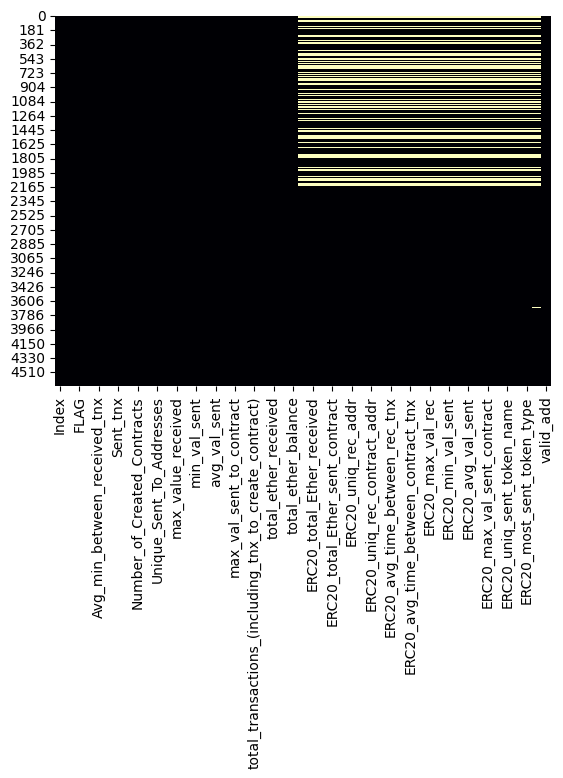

In [ ]:
# missing values
missing_values = df.isna()
sns.heatmap(missing_values, cbar=False, cmap='magma')
plt.show()

#### 4.

#### Identify Constant Values
Create a dataframe to identify constant values in the dataframe. Use the `nunique` function to identify the number of unique values in each column, and then filter the dataframe to only include columns with only one unique value.

In [ ]:
variance_df= df.nunique()
variance_df = variance_df[variance_df == 1]
mask=variance_df.index.to_list()

In [ ]:
mask

['min_value_sent_to_contract',
 'max_val_sent_to_contract',
 'avg_value_sent_to_contract',
 'total_ether_sent_contracts',
 'ERC20_avg_time_between_sent_tnx',
 'ERC20_avg_time_between_rec_tnx',
 'ERC20_avg_time_between_rec_2_tnx',
 'ERC20_avg_time_between_contract_tnx',
 'ERC20_min_val_sent_contract',
 'ERC20_max_val_sent_contract',
 'ERC20_avg_val_sent_contract']

Drop the columns that had only one unique value in the previous cell from the original dataframe (`df`). 

In [ ]:
df = df.drop(columns=mask)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4671 entries, 0 to 4680
Data columns (total 40 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Index                                                  4671 non-null   int64  
 1   Address                                                4671 non-null   object 
 2   FLAG                                                   4671 non-null   int64  
 3   Avg_min_between_sent_tnx                               4671 non-null   float64
 4   Avg_min_between_received_tnx                           4671 non-null   float64
 5   Time_Diff_between_first_and_last_(Mins)                4671 non-null   float64
 6   Sent_tnx                                               4671 non-null   int64  
 7   Received_Tnx                                           4671 non-null   int64  
 8   Number_of_Created_Contracts                     

#### Small Distributions
Loop through the columns of the dataframe (`df`) starting from the third column and print the distribution of each column that has less than 10 unique values.

In [ ]:
for i in df.columns[3:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')

The column ERC20_uniq_sent_addr.1 has the following distribution: 
0.0    3827
1.0      20
Name: ERC20_uniq_sent_addr.1, dtype: int64


Drop the column `ERC20_uniq_sent_addr.1` from the dataframe.

In [ ]:
drops = ['ERC20_uniq_sent_addr.1']
df.drop(drops, axis=1, inplace=True)
print(df.shape)

(4671, 39)


#### 5.

#### Category balance 
Group the dataframe by the column `FLAG` and then count the number of addresses in each group to understand how balanced is our dataset. Visualize it. 

In [ ]:
df.groupby ('FLAG')['Address'].count()

FLAG
0    2497
1    2174
Name: Address, dtype: int64

<Axes: xlabel='FLAG'>

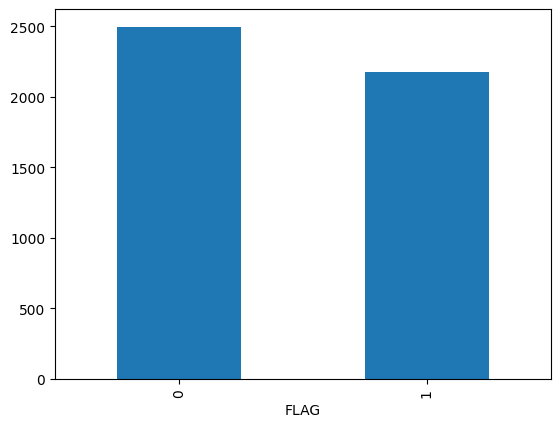

In [ ]:
df.groupby ('FLAG')['Address'].count().plot(kind='bar')

#### 6.

#### Identify and Visualize Correlation
Create a heatmap that visualizes the correlation between the numeric columns in the dataframe.

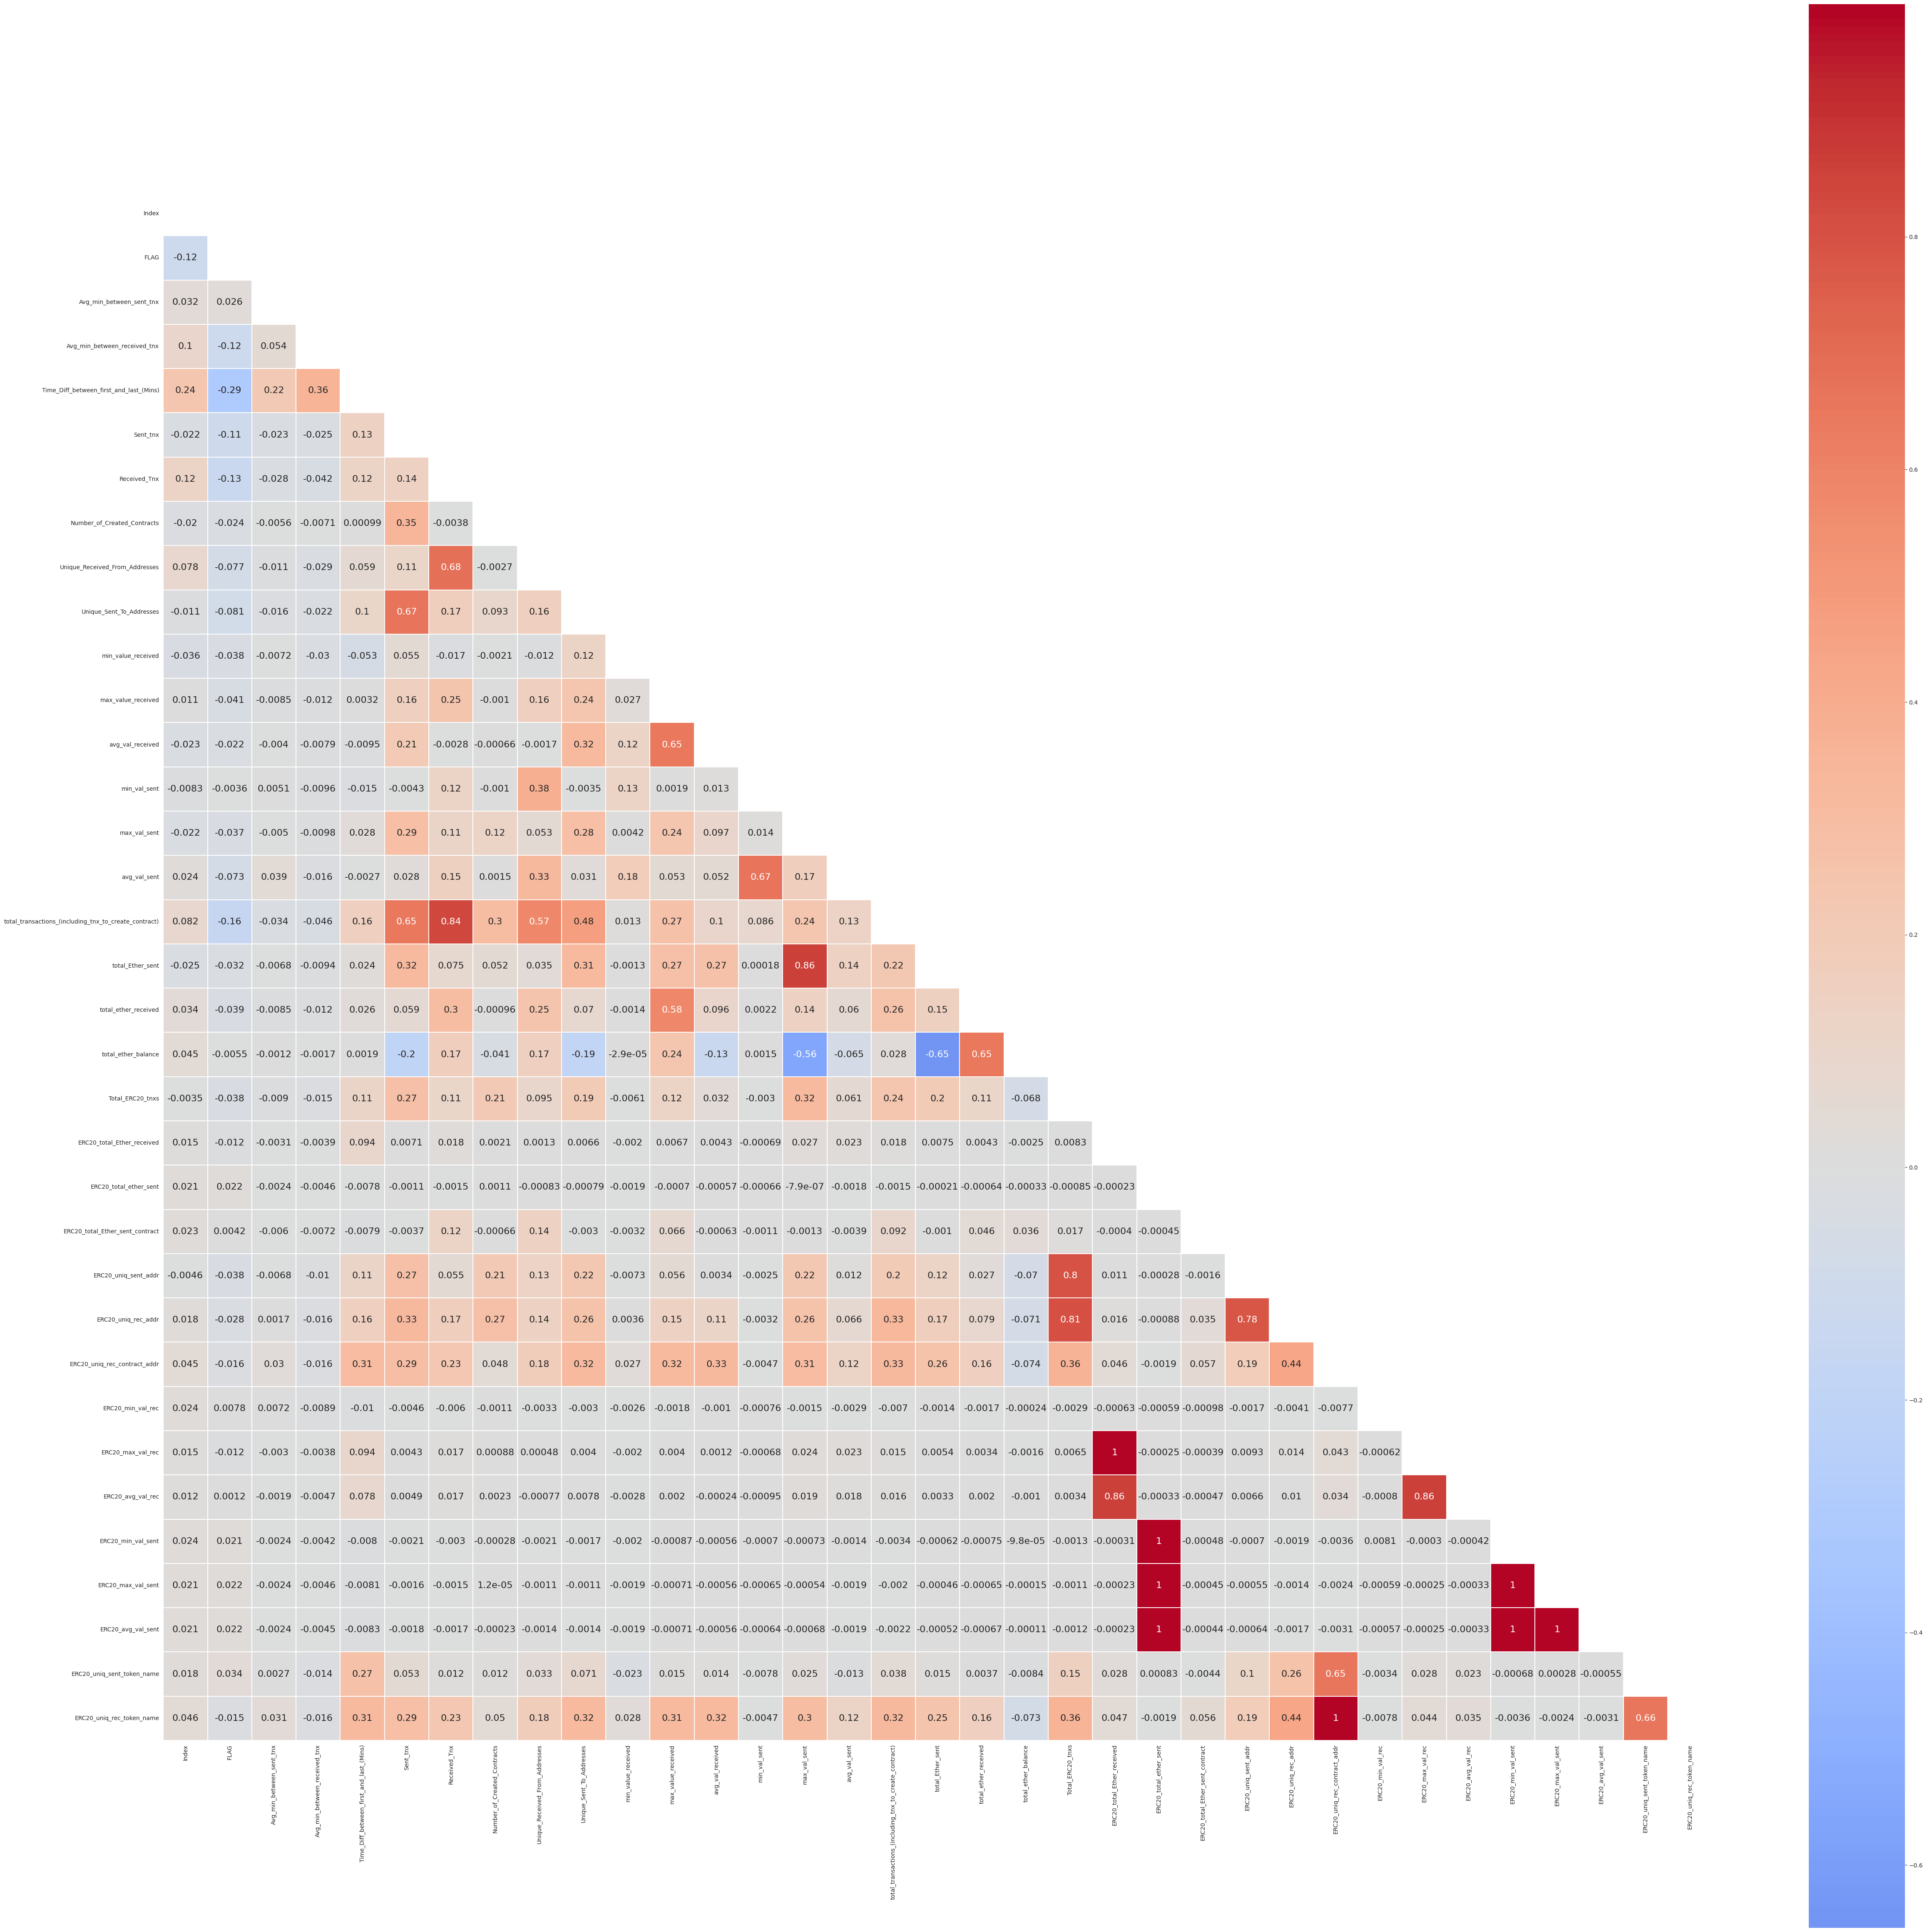

In [ ]:
corr = df.corr(numeric_only= True)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(60,60))
    sns.heatmap(corr,  mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=0.1, square=True,annot_kws={"size": 16})


Find any features with a correlation greater than 0.95 and print out a list of those features.

In [ ]:
# Create correlation matrix
corr_matrix = df.corr(numeric_only= True).abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print (to_drop)

['ERC20_max_val_rec', 'ERC20_min_val_sent', 'ERC20_max_val_sent', 'ERC20_avg_val_sent', 'ERC20_uniq_rec_token_name']


Drop any columns from the dataframe that have a correlation greater than 0.95. 

In [ ]:
df.drop(to_drop, axis=1, inplace=True)

#### 7.

#### Categorical data
Group the dataframe by the `ERC20_most_sent_token_type` and `ERC20_most_rec_token_type` columns and count the number of addresses associated with each token type. Then sort the resulting dataframe in descending order based on the number of addresses.

In [ ]:
grouped = df.groupby ('ERC20_most_sent_token_type')['Address'].count().reset_index()
grouped.sort_values('Address', ascending=False)

,ERC20_most_sent_token_type,Address
1,,1793
3,0,1544
164,blockwell.ai KYC Casper Token,65
102,OmiseGO,46
48,EOS,40
...,...,...
90,MEX,1
40,DGD,1
87,Lucky Token,1
86,Loopring,1


In [ ]:
grouped = df.groupby ('ERC20_most_rec_token_type')['Address'].count().reset_index()
grouped.sort_values('Address', ascending=False)

,ERC20_most_rec_token_type,Address
2,0,1544
39,Blockwell say NOTSAFU,779
179,OmiseGO,355
250,VIU,81
111,GSENetwork,80
...,...,...
163,Metal,1
164,Mithril Token,1
165,Mobile Phone Ad Chain,1
68,DEW,1


Drop the columns and create an updated version

In [ ]:
df.drop(columns=['ERC20_most_rec_token_type', 'ERC20_most_sent_token_type'], inplace=True)
df.to_csv('preprocessed.csv', index=False)